## Importing Required Libraries

In [ ]:
#Uncomment to download the library required to test CEC test functions
#!pip install opfunu
#!pip install --upgrade opfunu

In [1]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../MetaPy/DifferentialEvolution')

In [2]:
#Imports of class and functions required
from DifferentialEvolution_ClusteringBestV1 import DifferentialEvolution_ClusteringBestV1
from DifferentialEvolution_ClusteringBestV2 import DifferentialEvolution_ClusteringBestV2
from DifferentialEvolution_ClusteringAvg import DifferentialEvolution_ClusteringAvg
from DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from DifferentialEvolution import DifferentialEvolution
from sklearn import cluster
from PlottingFunctions import PlottingSnapshots , PlottingOptimalsFound , MultiPlottingOptimalsFound
from AuxiliarFunctions import objectiveFunctionCEC , individual

## Differential Evolution

In [115]:
#Init Diff Evol
functionNumber = '20'
dimension = 10  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

DiffEvol = DifferentialEvolution(objectiveFunction,initializeIndividual)

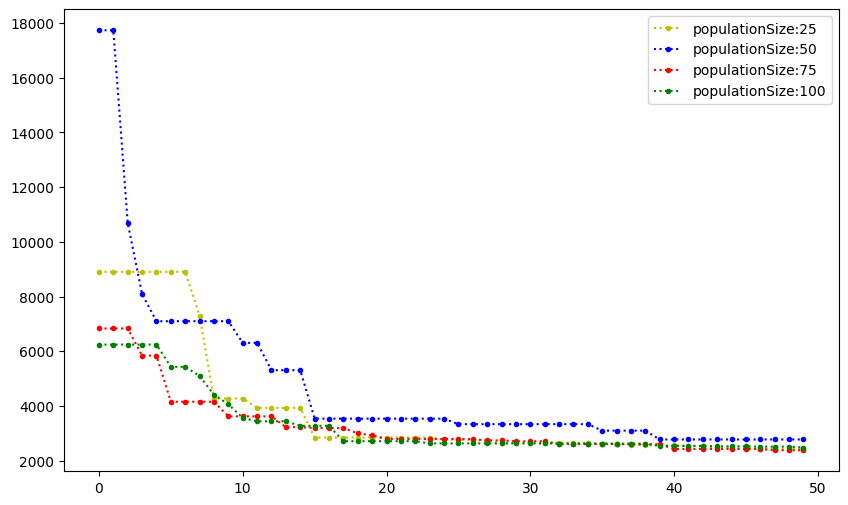

In [117]:
parameterList = [25,50,75,100]
parameterName = 'populationSize'
kwargsOptimizer = {
                    'iterations': 50,
                    'scalingFactor': 0.5,
                    'crossoverRate': 0.7
                  }
ftmList = ['.:y','.:b','.:r','.:g']
MultiPlottingOptimalsFound(parameterList,parameterName,DiffEvol,kwargsOptimizer,ftmList)

In [7]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 100
scalingFactor = 0.5
crossoverRate = 0.5

optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)
optimalFound , objectiveFunction(optimalFound)

(array([-55.27648387, -70.4295228 ]), np.float64(100.00000002393354))

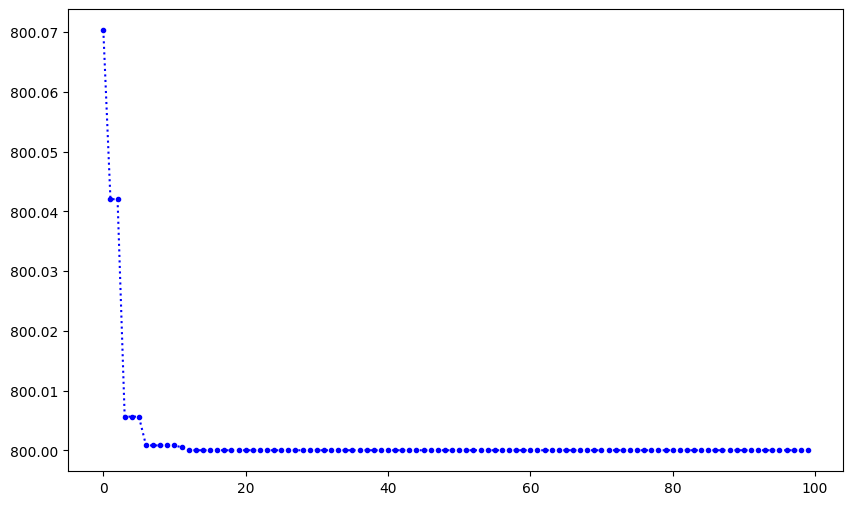

In [163]:
#Plotting of optimal values at each iteration
PlottingOptimalsFound(snapshots,YScale='linear')

## Differential Evolution with Clustering

### DBSCAN

In [151]:
# Init Diff Evol Clustering with DBSCAN
functionNumber = '8'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_Clust_dbscan = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [152]:
#Calling Diff Evol Clustering
iterations = 100
populationSize = 100
scalingFactor = 0.9
crossoverRate = 0.8
clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_clust_dbscan , snapshots_clust_dbscan = DiffEvol_Clust_dbscan(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)

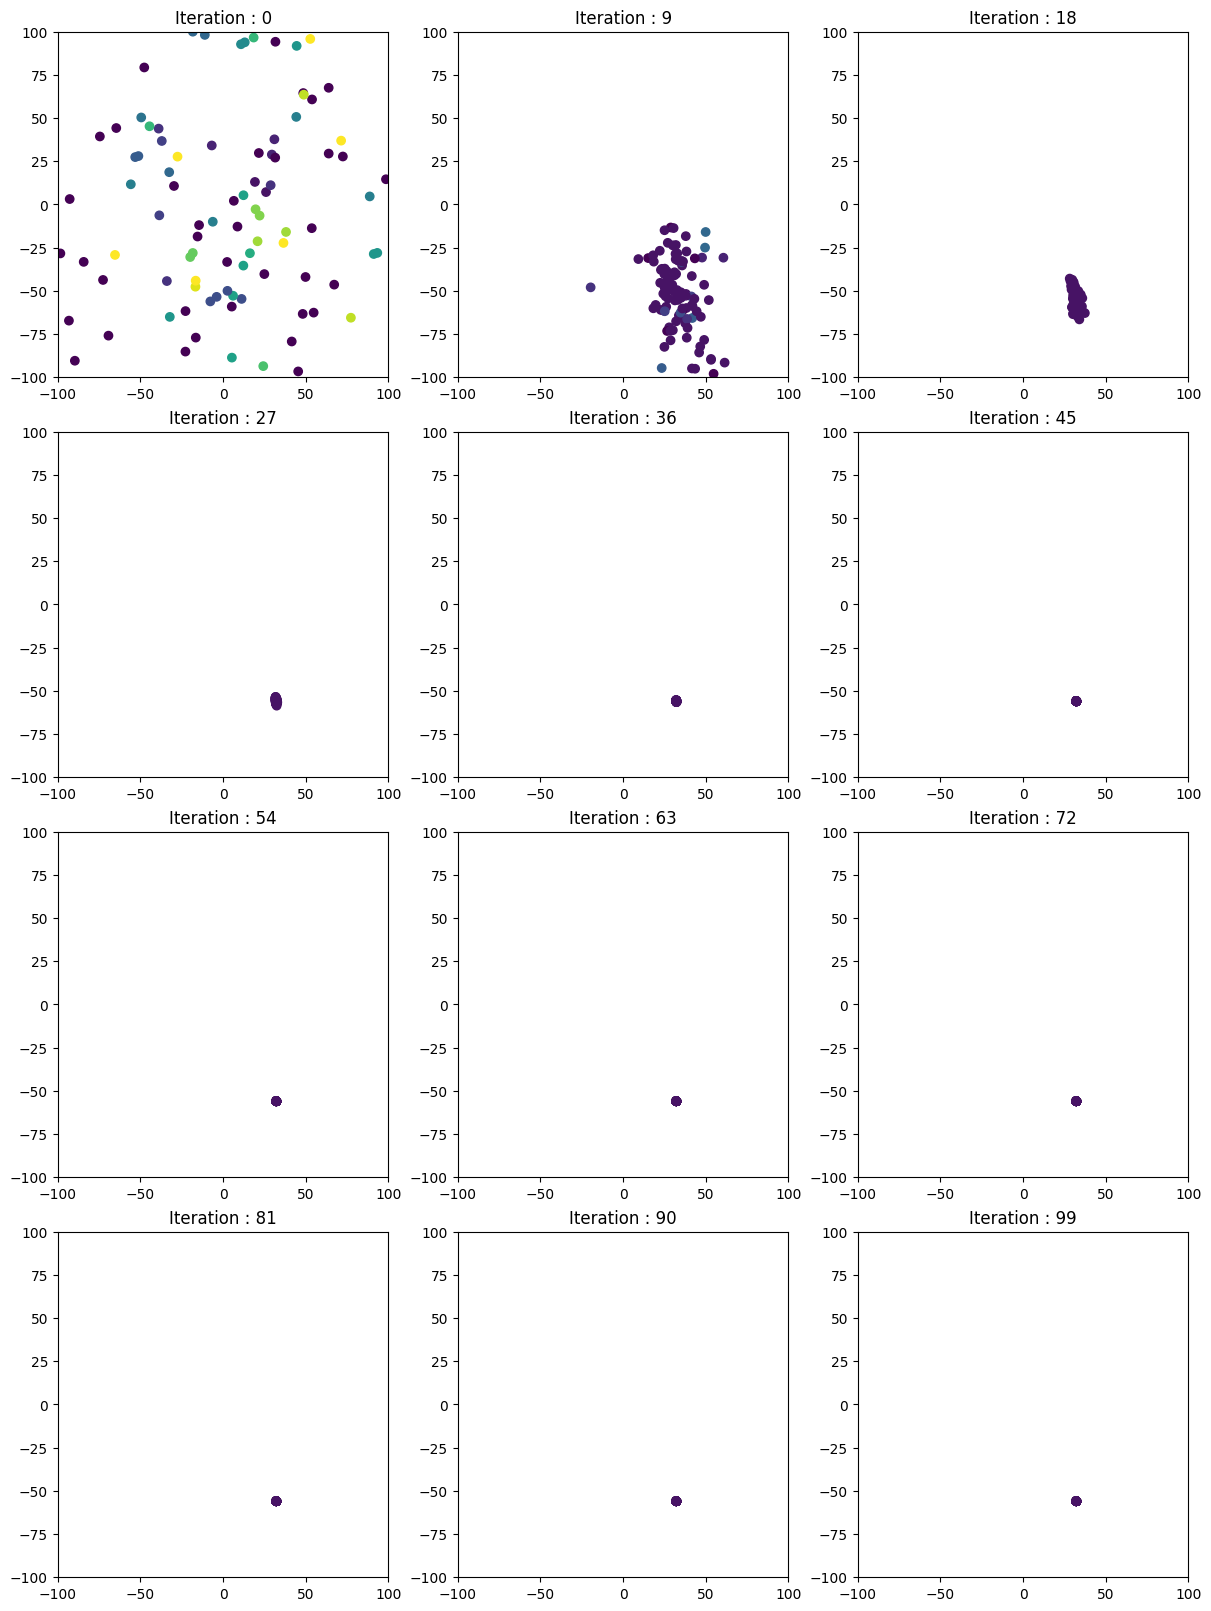

In [153]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}
Scatter_kw = {'vmin':-1,'vmax':20,'cmap':'viridis'}

PlottingSnapshots(snapshots_clust_dbscan,9,SubPlot_kw,Scatter_kw=Scatter_kw)

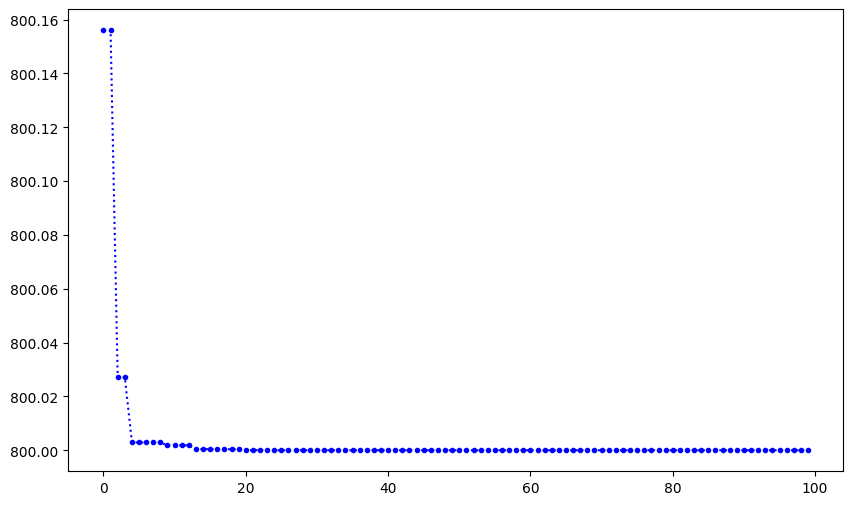

In [154]:
#Plotting of optimal values at each iteration

PlottingOptimalsFound(snapshots_clust_dbscan,YScale='linear')

### DBSCAN - BestV1

In [196]:
# Init Diff Evol Clustering Best with DBSCAN
functionNumber = '9'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_ClustBest_dbscan = DifferentialEvolution_ClusteringBestV1(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [197]:
#Calling Diff Evol Clustering Best
iterations = 100
populationSize = 100
scalingFactor = 0.9
crossoverRate = 0.8
clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_clustbest_dbscan , snapshots_clustbest_dbscan = DiffEvol_ClustBest_dbscan(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw=clusteringAlgorithm_kw)

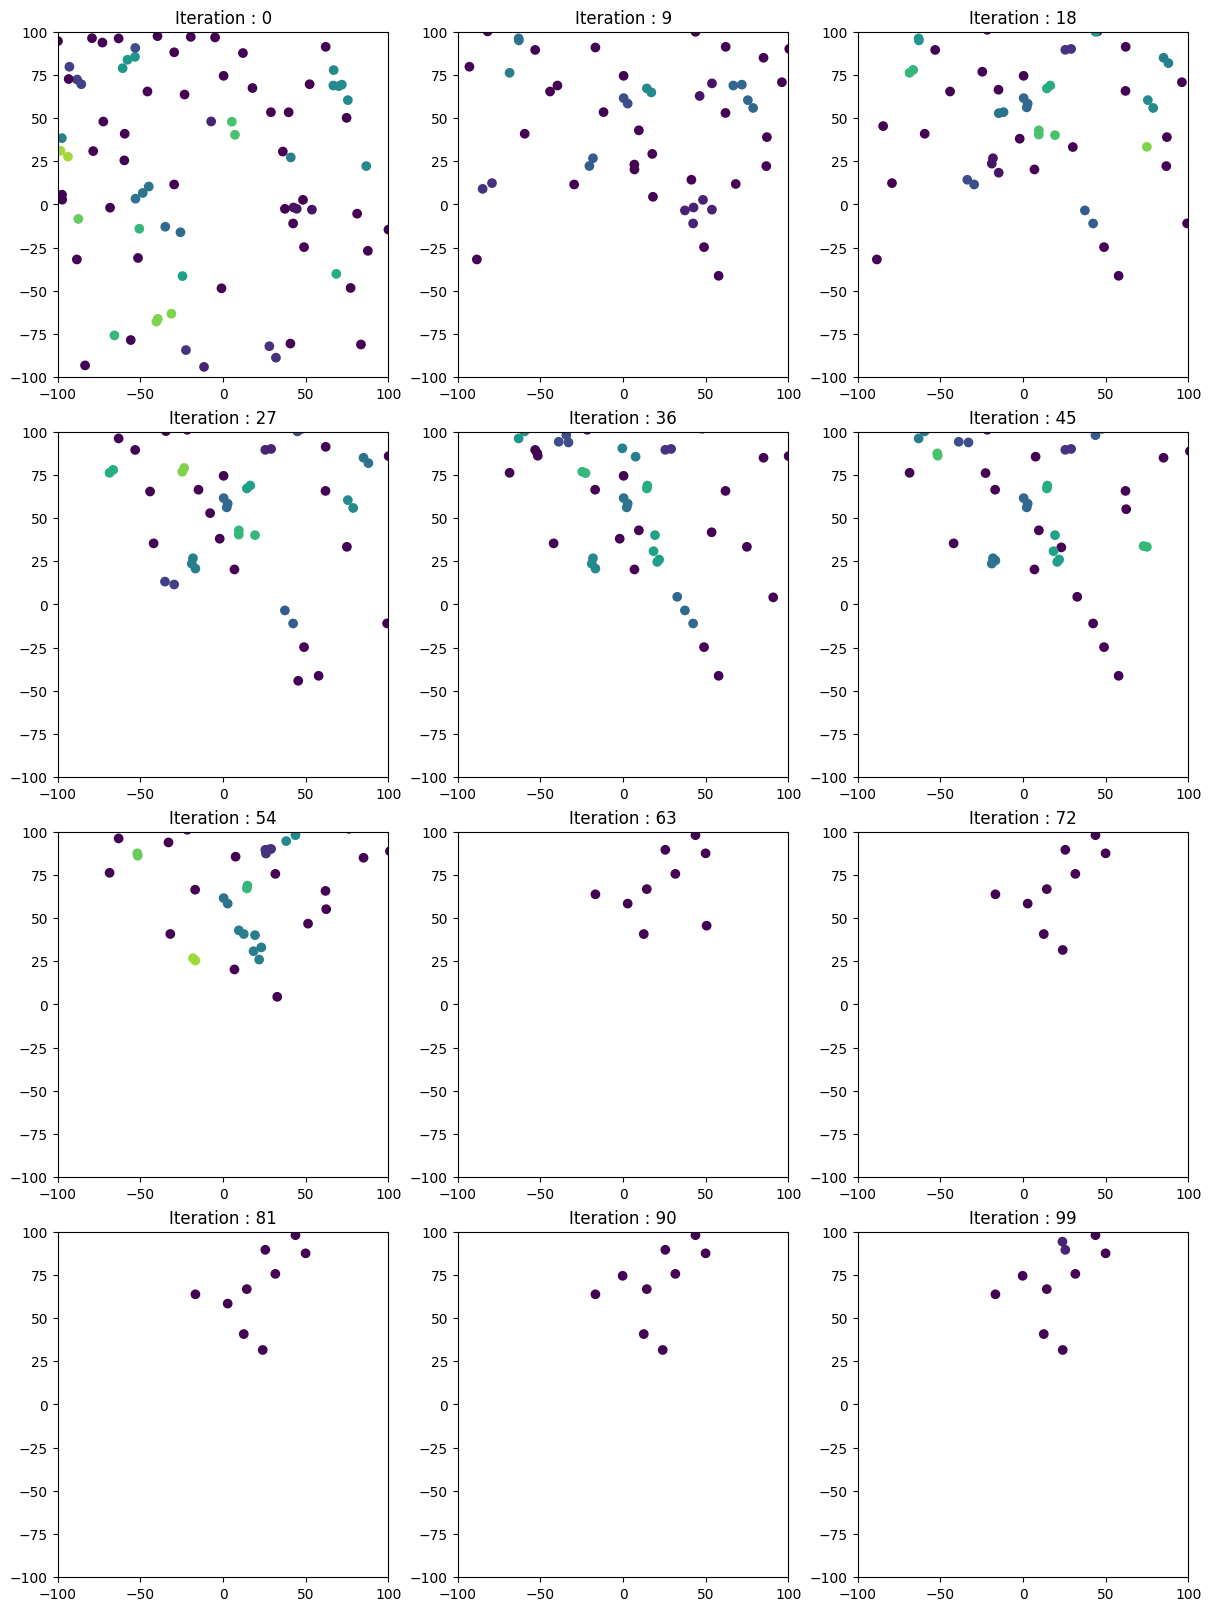

In [198]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}
Scatter_kw = {'vmin':-1,'vmax':20,'cmap':'viridis'}

PlottingSnapshots(snapshots_clustbest_dbscan,9,SubPlot_kw,Scatter_kw=Scatter_kw)

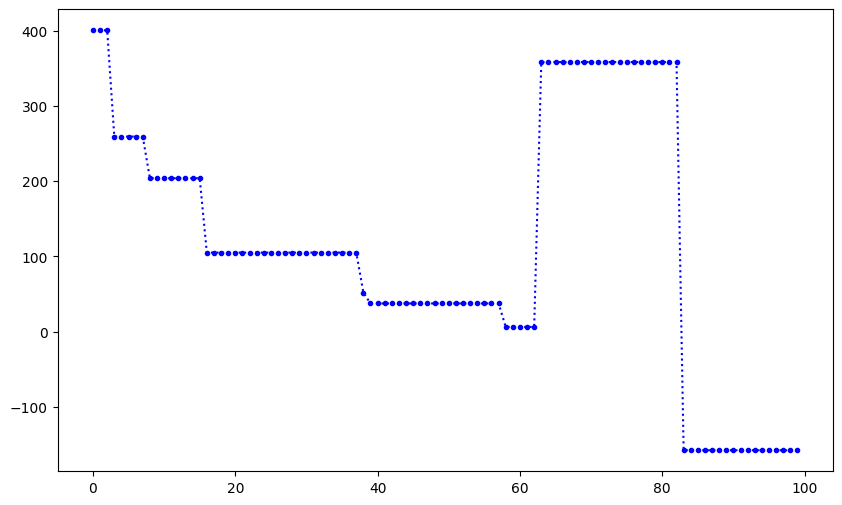

In [199]:
#Plotting of optimal values at each iteration

PlottingOptimalsFound(snapshots_clustbest_dbscan,YScale='linear')

### DBSCAN - BestV2

In [216]:
# Init Diff Evol Clustering Best with DBSCAN
functionNumber = '1'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_ClustBest_dbscan = DifferentialEvolution_ClusteringBestV2(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [217]:
#Calling Diff Evol Clustering Best
iterations = 100
populationSize = 100
scalingFactor = 0.9
crossoverRate = 0.8
clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_clustbest_dbscan , snapshots_clustbest_dbscan = DiffEvol_ClustBest_dbscan(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw=clusteringAlgorithm_kw)

UnboundLocalError: cannot access local variable 'indexIndividual' where it is not associated with a value

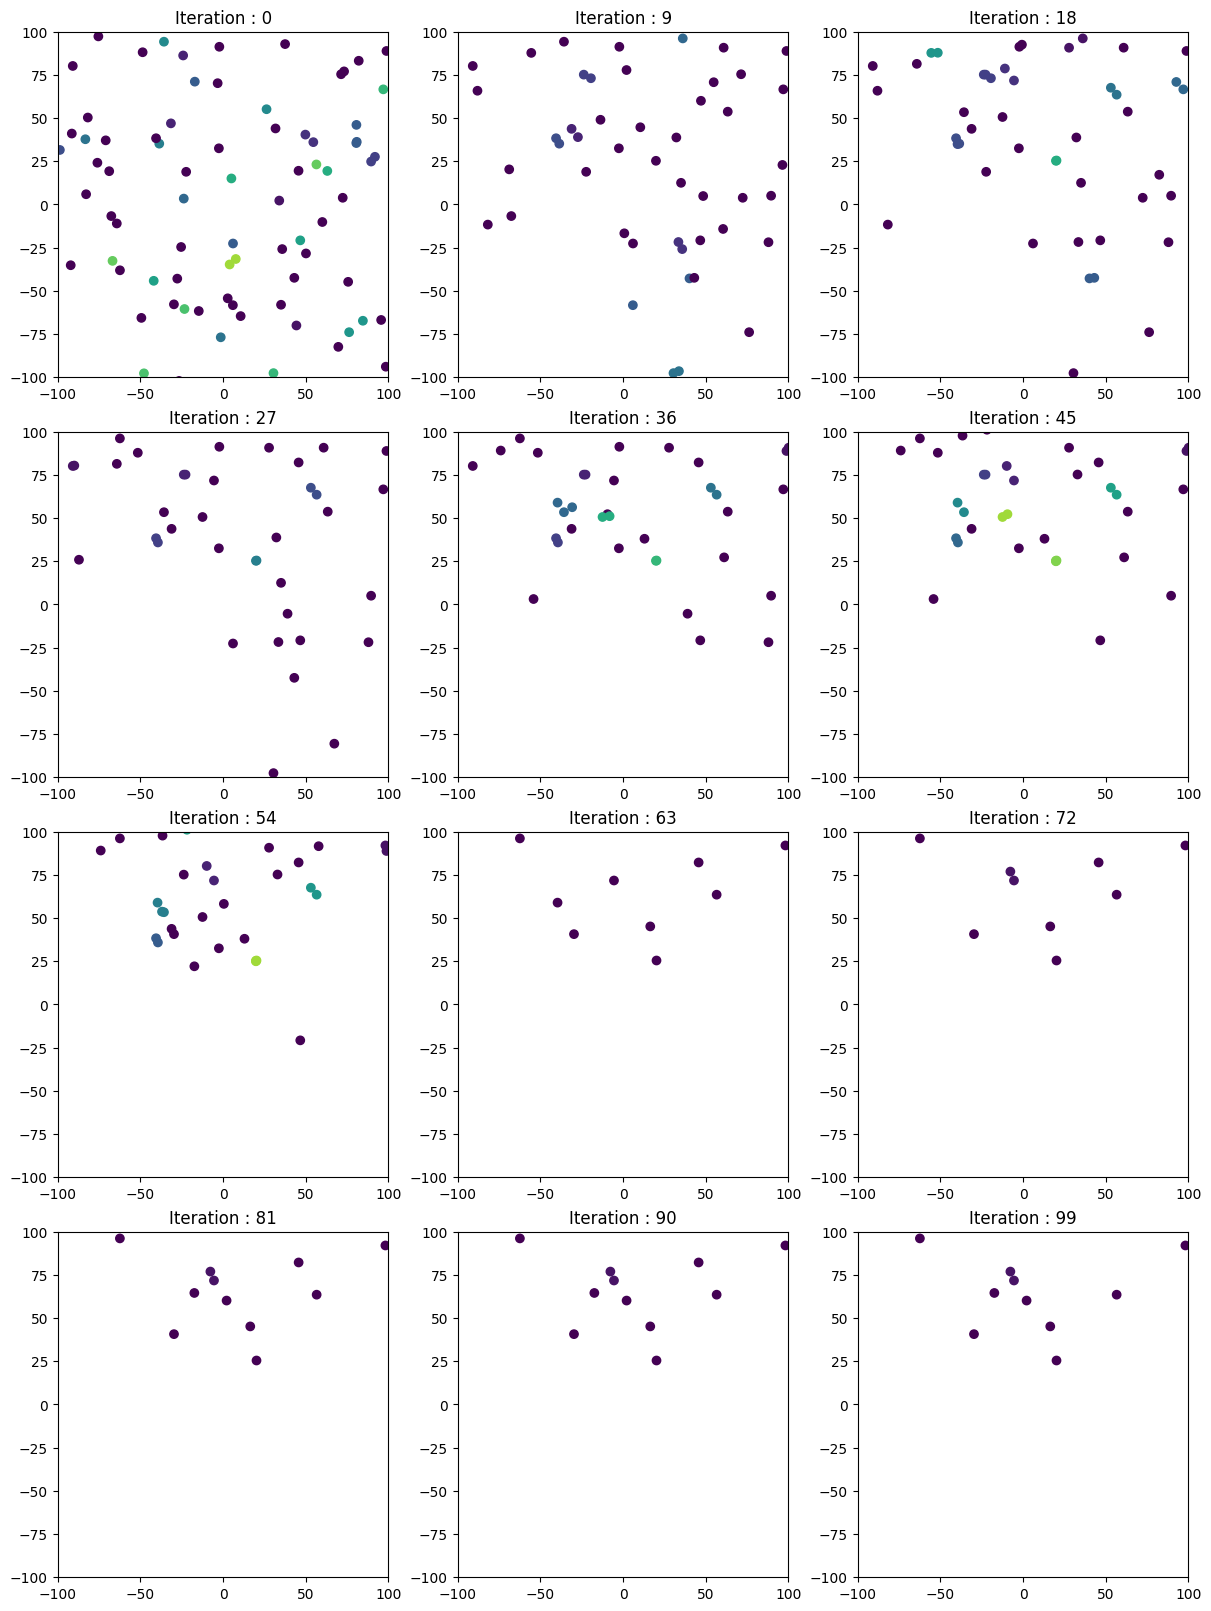

In [214]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}
Scatter_kw = {'vmin':-1,'vmax':20,'cmap':'viridis'}

PlottingSnapshots(snapshots_clustbest_dbscan,9,SubPlot_kw,Scatter_kw=Scatter_kw)

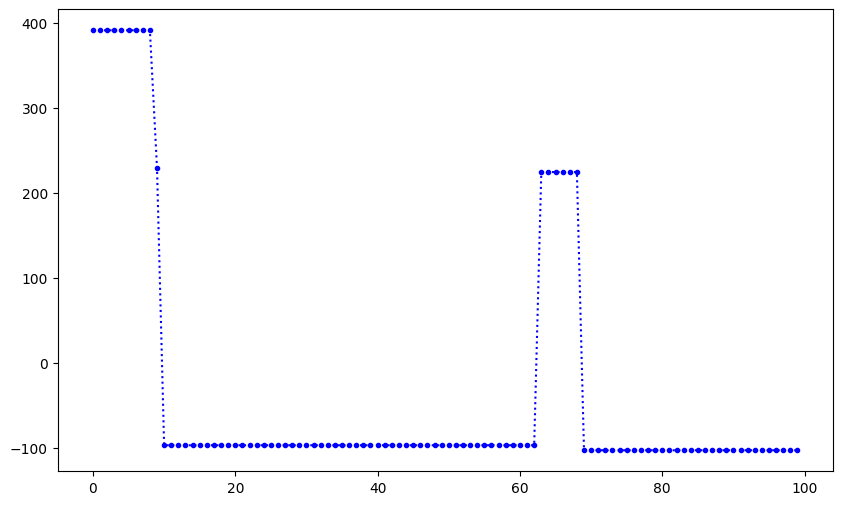

In [215]:
#Plotting of optimal values at each iteration

PlottingOptimalsFound(snapshots_clustbest_dbscan,YScale='linear')

### DBSCAN - Average

In [48]:
# Init Diff Evol Clustering Average with DBSCAN
functionNumber = '9'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_ClustAvg_dbscan = DifferentialEvolution_ClusteringAvg(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [49]:
#Calling Diff Evol Clustering Avg
iterations = 100
populationSize = 100
scalingFactor = 0.9
crossoverRate = 0.8
clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_clustavg_dbscan , snapshots_clustavg_dbscan = DiffEvol_ClustAvg_dbscan(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw=clusteringAlgorithm_kw)

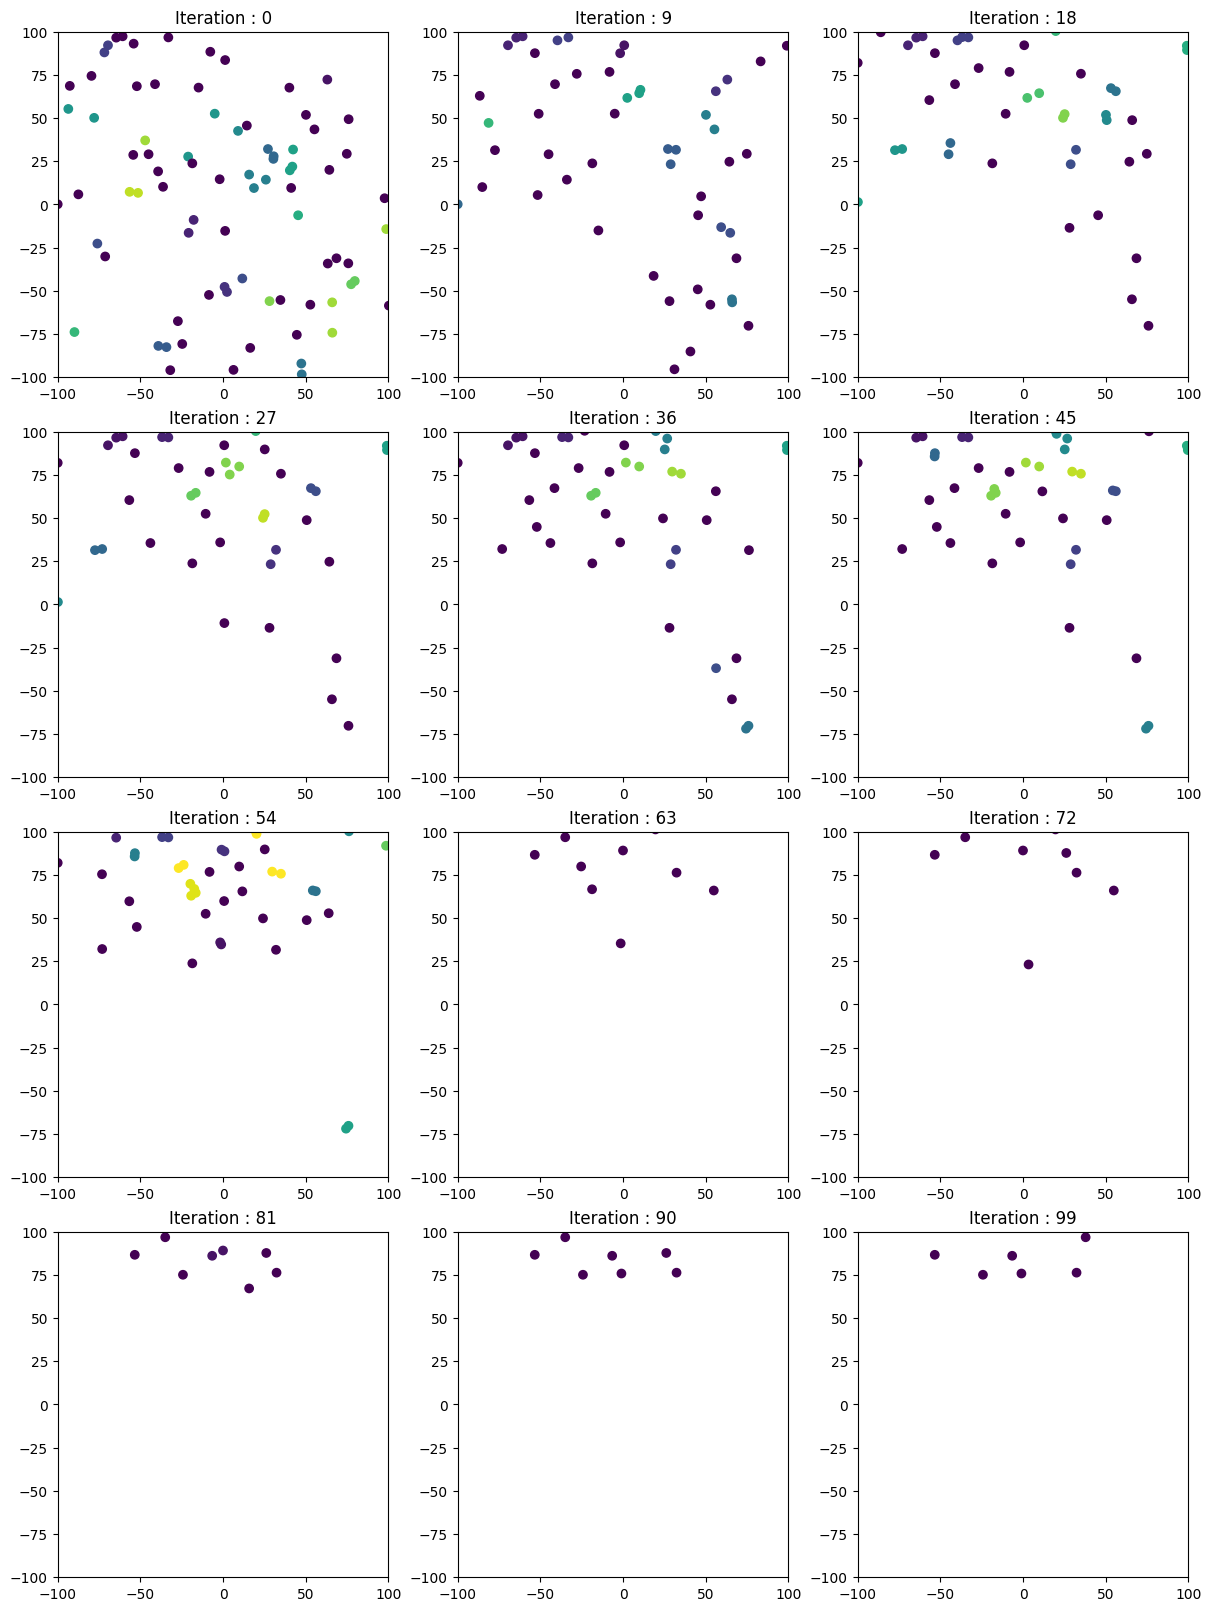

In [50]:
#Plotting of snapshots
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}
Scatter_kw = {'vmin':-1,'vmax':20,'cmap':'viridis'}

PlottingSnapshots(snapshots_clustavg_dbscan,9,SubPlot_kw,Scatter_kw=Scatter_kw)

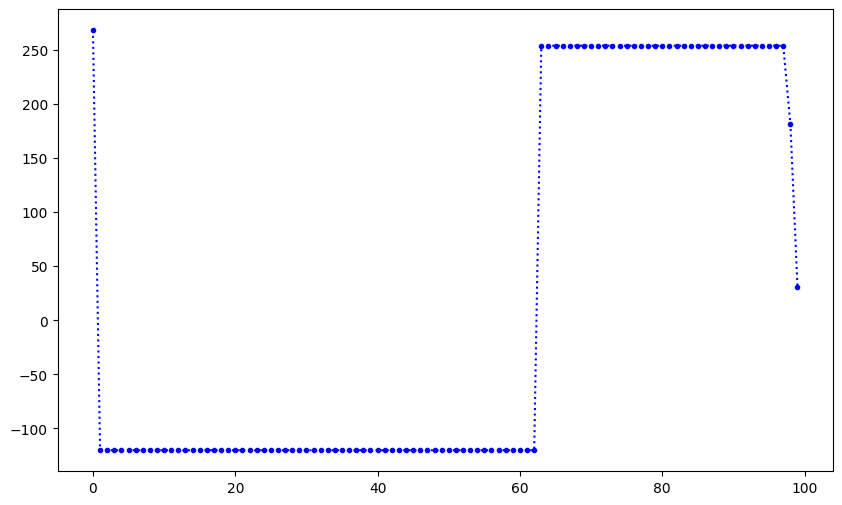

In [52]:
#Plotting of optimal values at each iteration

PlottingOptimalsFound(snapshots_clustavg_dbscan,YScale='linear')